In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv('simplelinearregression.csv')

In [63]:
df.head()

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      7 non-null      int64
 1   Premium  7 non-null      int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [65]:
df.isnull().sum()

Age        0
Premium    0
dtype: int64

In [66]:
df.duplicated().sum()

0

In [67]:
df.describe()

,Age,Premium
count,7.000000,7.000000
mean,25.857143,20214.285714
std,5.273474,6283.955382
min,18.000000,10000.000000
25%,22.500000,16500.000000
50%,26.000000,21000.000000
75%,29.500000,25250.000000
max,33.000000,27000.000000


#### Exploratory Data Analysis

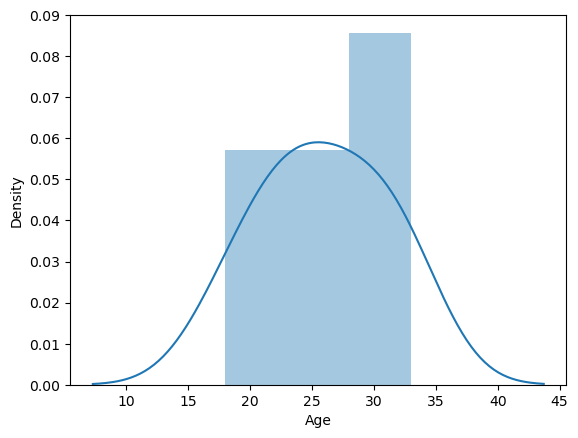

In [68]:
sns.distplot(df['Age'])
plt.show()

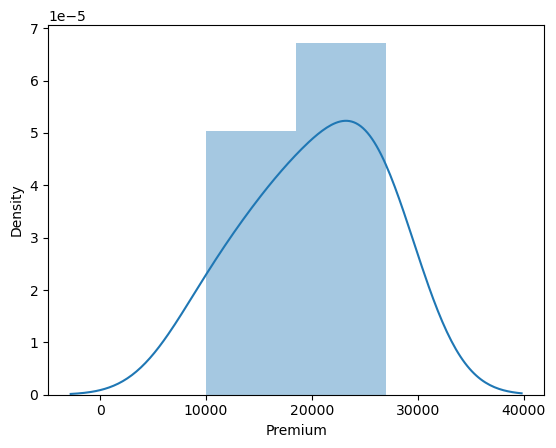

In [69]:
sns.distplot(df['Premium'])
plt.show()

#### Correlation

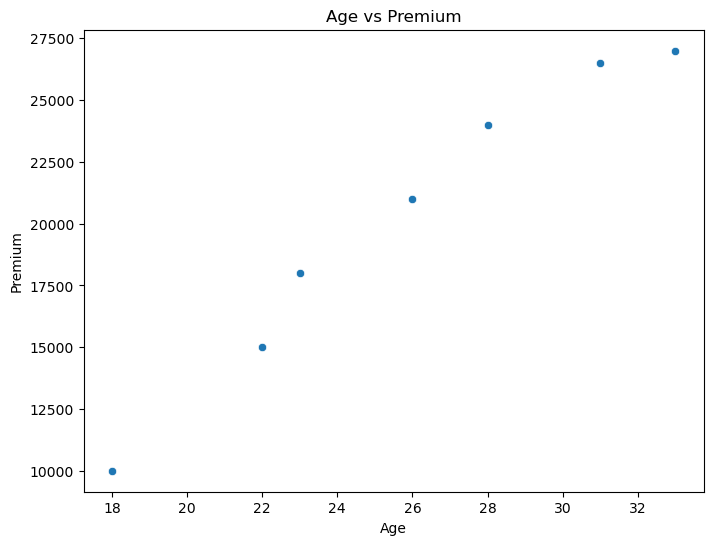

In [70]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Premium', data=df)
plt.title('Age vs Premium')
plt.xlabel('Age')
plt.ylabel('Premium')
plt.show()

              Age   Premium
Age      1.000000  0.984332
Premium  0.984332  1.000000


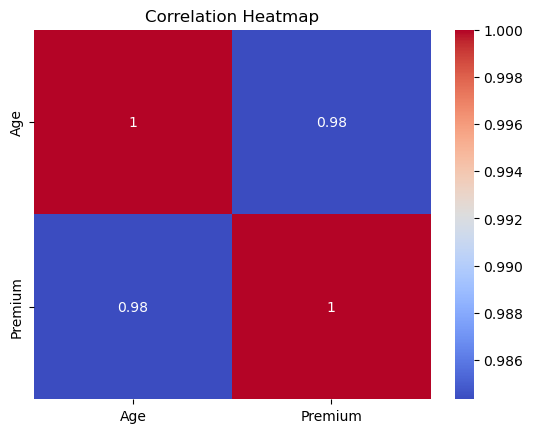

In [71]:
correlation = df.corr()
print(correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Prepocessing Modeling

In [72]:
X = df.drop(['Premium'], axis=1)
y = df['Premium']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 1/3, random_state = 0)

#### Machine Learning Regression - Simple Linear Regression

In [74]:
regressor = LinearRegression()

In [75]:
regressor.fit(X_train, y_train)

LinearRegression()

In [76]:
regressor.coef_

array([833.33333333])

In [77]:
y_pred = regressor.predict(X_test)

In [78]:
result = pd.DataFrame({'Actual':y_test, 'Predict:':y_pred})

In [79]:
result

,Actual,Predict:
6,27000,28166.666667
2,18000,19833.333333
1,15000,19000.000000
3,21000,22333.333333
0,10000,15666.666667


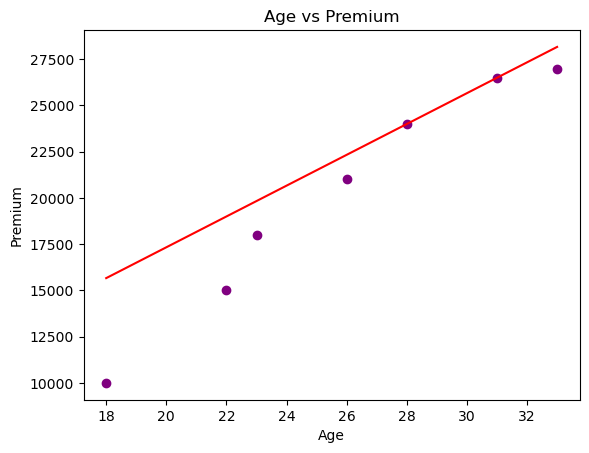

In [80]:
plt.scatter(X, y, color='purple')
plt.plot(X, regressor.predict(X), color='red')
plt.xlabel('Age')
plt.ylabel('Premium')
plt.title('Age vs Premium')
plt.show()

#### Evaluate Model

In [81]:
#Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [82]:
#Mean Absolute Error (MAE)
mae= mean_absolute_error(y_test, y_pred)

In [83]:
#Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

In [84]:
#Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [85]:
#R2 Score
r2 = r2_score(y_test, y_pred)

In [86]:
print(f'Coefficients: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MSE): {mape}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R2 Score: {r2}')

Coefficients: [833.33333333]
Intercept: 666.6666666666715
Mean Absolute Error (MAE): 2799.999999999999
Mean Squared Error (MSE): 10922222.222222222
Mean Absolute Percentage Error (MSE): 0.20837742504409168
Root Mean Squared Error (RMSE): 3304.87854878545
R2 Score: 0.6645509145509145
